### Getting historical data from Binance API

For this project, I used the `binance`, `pandas`, and `mplfinance` libraries to process and analyze the data.

In [1]:
import binance as bn
import pandas as pd
import mplfinance as mpf
import seaborn as sns

To acquire the data from the Binance API, I used the `Client` class to set up and authenticate my account.

In [2]:
api = 'DPyd3xlz5HsNt9M6uVLBJrQOLNcCR2NR5nDumHhnQfKOcdzUqBWq4H59e03t2oFE'
secret = '40XgBgDCh0A0tyDqqvU8LlOmcqb9pKTv8IFywLVePYHmyODxFhheSKmpPxRYx8ZI'

client = bn.Client(api, secret)

Next, I used `client.get_historical_klines()` to get the historical data of the 10 largest cryptocurrencies by market capitalization for the year 2020, and created a data frame for each cryptocurrency using `pd.DataFrame()`.

The cryptocurrencies that I analyzed are the following:
1. BTC - Bitcoin
2. ETH - Ethereum
3. BNB - Binance Coin
4. ADA - Cardano
5. DOGE - Dogecoin
6. LTC - Litecoin
7. LINK - ChainLink
8. XLM - Stellar
9. VET - VeChain
10. ATOM - Cosmos

In [3]:
btc = pd.DataFrame(client.get_historical_klines('BTCUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
eth = pd.DataFrame(client.get_historical_klines('ETHUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
bnb = pd.DataFrame(client.get_historical_klines('BNBUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
ada = pd.DataFrame(client.get_historical_klines('ADAUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
doge = pd.DataFrame(client.get_historical_klines('DOGEUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
ltc = pd.DataFrame(client.get_historical_klines('LTCUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
link = pd.DataFrame(client.get_historical_klines('LINKUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
xlm = pd.DataFrame(client.get_historical_klines('XLMUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
vet = pd.DataFrame(client.get_historical_klines('VETUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))
atom = pd.DataFrame(client.get_historical_klines('ATOMUSDT', bn.Client.KLINE_INTERVAL_1DAY, '1 Jan, 2019', '31 Dec, 2019'))

cryptocurrencies = [btc, eth, bnb, ada, doge, ltc, link, xlm, vet, atom]

### Cleaning the data

Although it had no null values, the data still had to be cleaned as (1) there were no column headers, (2) the open and close times were stored as integers, (3) the numerical data was stored as strings, and (4) there was an extra column that had no purpose. In the cleaning process, I referred to the [Binance documentation](https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data) to understand the data.

In [4]:
null_count = 0
for symbol in cryptocurrencies:
    for column in btc.isnull().any():
        if column == True:
            null_count += 1
print("Null values: ", null_count)
btc.dtypes

Null values:  0


0      int64
1     object
2     object
3     object
4     object
5     object
6      int64
7     object
8      int64
9     object
10    object
11    object
dtype: object

To clean the data, I first added the column headers. Next, I used `pd.to_datetime()` to convert the *open_time* and *close_time* columns from `int64` to `datetime64[ns]`, and converted the numerical data (excluding *number_of_trades*) from `object` to `float64`. Finally, I removed the extra column.

In [5]:
for symbol in cryptocurrencies:
    symbol.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', \
                     'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'extra_column']
    symbol['open_time'] = pd.to_datetime(symbol['open_time']/1000, unit = 's')
    symbol['close_time'] = pd.to_datetime(symbol['close_time']/1000, unit = 's')
    numerical_data = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', \
          'taker_buy_quote_asset_volume']
    symbol[numerical_data] = symbol[numerical_data].apply(pd.to_numeric, axis = 1)
    symbol.drop('extra_column', axis = 1, inplace = True)

This results to clean data that can be transformed and analyzed.

In [6]:
btc.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                      datetime64[ns]
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
dtype: object

In [7]:
btc.head(10)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2019-01-01,3701.23,3810.16,3642.00,3797.14,23741.687033,2019-01-01 23:59:59.999000064,8.814925e+07,154227,12919.155899,4.797344e+07
1,2019-01-02,3796.45,3882.14,3750.45,3858.56,35156.463369,2019-01-02 23:59:59.999000064,1.338766e+08,218538,17921.600114,6.827790e+07
2,2019-01-03,3857.57,3862.74,3730.00,3766.78,29406.948359,2019-01-03 23:59:59.999000064,1.116574e+08,199812,14793.083267,5.617250e+07
3,2019-01-04,3767.20,3823.64,3703.57,3792.01,29519.554671,2019-01-04 23:59:59.999000064,1.110346e+08,192232,15579.303258,5.861620e+07
4,2019-01-05,3790.09,3840.99,3751.00,3770.96,30490.667751,2019-01-05 23:59:59.999000064,1.158935e+08,203673,14908.914175,5.666746e+07
5,2019-01-06,3771.12,4027.71,3740.00,3987.60,36553.806709,2019-01-06 23:59:59.999000064,1.421988e+08,240496,19772.887008,7.690371e+07
6,2019-01-07,3987.62,4017.90,3921.53,3975.45,31869.846264,2019-01-07 23:59:59.999000064,1.268304e+08,221219,16404.352241,6.528761e+07
7,2019-01-08,3976.76,4069.80,3903.00,3955.13,38901.423122,2019-01-08 23:59:59.999000064,1.547788e+08,242898,20047.977601,7.978110e+07
8,2019-01-09,3955.45,4006.81,3930.04,3966.65,28989.439511,2019-01-09 23:59:59.999000064,1.152190e+08,209240,14984.337020,5.955901e+07
9,2019-01-10,3966.06,3996.01,3540.00,3585.88,59402.228510,2019-01-10 23:59:59.999000064,2.217893e+08,374760,28288.322574,1.056163e+08


### Analyzing data

#### Measuring correlation between cryptocurrencies

To measure the correlation among cryptocurrencies, I first merged the *close* column of each data frame into the *close_prices* data frame, then used `.diff()` to get the differences in changes in closing prices for each cryptocurrency and stored it in *price_direction*. I then used `.corr()` to create the correlation heatmap. Since the heatmap uses the Pearson correlation, I squared the entire data frame to get the correlation of determination as the correlation method. Finally, I used `.heatmap()` to create the heatmap showing the correlation between cryptocurrencies.

<AxesSubplot:>

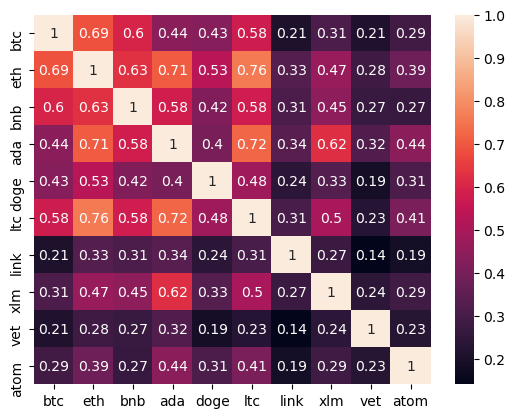

In [20]:
close_prices = btc[['open_time']]

for symbol in cryptocurrencies:
    close_prices = pd.merge(close_prices, symbol[['open_time', 'close']], on = 'open_time')

close_prices.columns = ['open_time', 'btc', 'eth', 'bnb', 'ada', 'doge', 'ltc', 'link', 'xlm', 'vet', 'atom']

close_prices.set_index('open_time', inplace = True)

symbols = ['btc', 'eth', 'bnb', 'ada', 'doge', 'ltc', 'link', 'xlm', 'vet', 'atom']
price_direction = pd.DataFrame(columns = symbols, index = close_prices.index)

for symbol in symbols:
    price_direction[symbol] = close_prices[symbol].diff()

price_direction.dropna(inplace = True)

r_squared = price_direction.corr(method = 'pearson') ** 2
sns.heatmap(r_squared, annot = True)

Below shows the charts of the most correlated pair, which is LTC (Litecoin) and ETH (Ethereum). This can guide the trading decisions of quantitative traders, like managing risk and selecting cryptocurrencies to trade. For instance, knowing that this pair is highly correlated can give an idea on the risk of trading both cryptocurrencies in one portfolio.

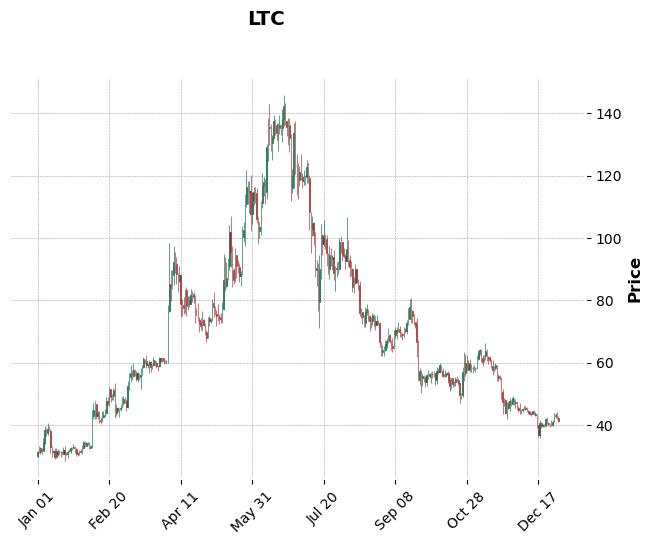

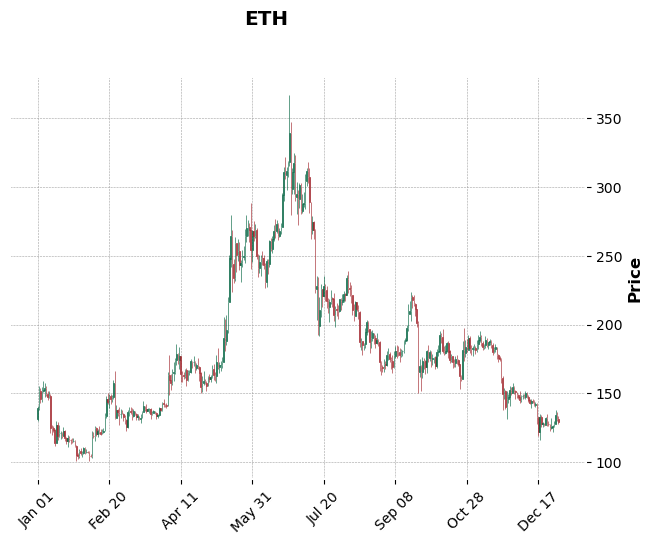

In [21]:
mpf.plot(ltc.set_index('open_time'), type = 'candle', style = 'charles', title = 'LTC')
mpf.plot(eth.set_index('open_time'), type = 'candle', style = 'charles', title = 'ETH')